#### Importing necessary libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [47]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

### Read & View the data

In [4]:
df = pd.read_csv('Cyber Attack detection.csv')

In [5]:
df.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,12,0,tcp,http,SF,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21


In [6]:
df['41'].unique()

array(['normal', 'ipsweep', 'portsweep', 'teardrop'], dtype=object)

In [7]:
def change(x):
    if x=='normal':
        return 'normal'
    else:
        return 'attack'

In [8]:
df['41']=df['41'].apply(change)

In [9]:
df['41'].unique()

array(['normal', 'attack'], dtype=object)

### View basic information about the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74765 entries, 0 to 74764
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  74765 non-null  int64  
 1   0           74765 non-null  int64  
 2   1           74765 non-null  object 
 3   2           74765 non-null  object 
 4   3           74765 non-null  object 
 5   4           74765 non-null  int64  
 6   5           74765 non-null  int64  
 7   6           74765 non-null  int64  
 8   7           74765 non-null  int64  
 9   8           74765 non-null  int64  
 10  9           74765 non-null  int64  
 11  10          74765 non-null  int64  
 12  11          74765 non-null  int64  
 13  12          74765 non-null  int64  
 14  13          74765 non-null  int64  
 15  14          74765 non-null  int64  
 16  15          74765 non-null  int64  
 17  16          74765 non-null  int64  
 18  17          74765 non-null  int64  
 19  18          74765 non-nul

### View basic statistical information about the dataset

In [11]:
df.describe()

,Unnamed: 0,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42
count,74765.000000,74765.000000,7.476500e+04,7.476500e+04,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.0,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000,74765.000000
mean,63112.962121,475.319521,7.195710e+04,3.212933e+04,0.000094,0.035578,0.000134,0.207865,0.001244,0.640473,0.456791,0.001832,0.001846,0.507096,0.020304,0.000548,0.006754,0.0,0.000013,0.011677,22.363940,26.517448,0.014349,0.012281,0.082613,0.083078,0.963114,0.033764,0.147666,145.246666,176.111349,0.776834,0.066300,0.182970,0.049308,0.013686,0.006890,0.078756,0.082624,19.877162
std,36355.910329,3357.244122,7.618488e+06,5.219251e+06,0.009676,0.324432,0.016355,2.191865,0.046962,0.479865,31.075969,0.042768,0.058487,31.669189,0.621744,0.024527,0.128243,0.0,0.003657,0.107426,55.016794,57.631872,0.097844,0.088414,0.272706,0.272622,0.161132,0.157810,0.304856,103.924668,99.710757,0.357530,0.184365,0.324657,0.138320,0.089019,0.063036,0.247970,0.264952,2.061984
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31610.000000,0.000000,4.500000e+01,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000,77.000000,0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,63317.000000,0.000000,2.220000e+02,3.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,154.000000,253.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,94590.000000,0.000000,3.150000e+02,1.718000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,255.000000,255.000000,1.000000,0.020000,0.170000,0.030000,0.000000,0.000000,0.000000,0.000000,21.000000
max,125972.000000,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,4.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### View all values in the categorical columns

In [12]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42'],
      dtype='object')

In [13]:
df['Unnamed: 0'].dtype

dtype('int64')

In [14]:
df['Unnamed: 0'].unique()

array([     0,      1,      3, ..., 125969, 125970, 125972], dtype=int64)

In [15]:
for i in df.columns:
    if df[i].dtype == 'O':
        print(f"Unique values in '{i}' are :: {df[i].unique()}")
        print('---------------------------------------------------------------')

Unique values in '1' are :: ['tcp' 'udp' 'icmp']
---------------------------------------------------------------
Unique values in '2' are :: ['ftp_data' 'other' 'http' 'eco_i' 'telnet' 'private' 'domain_u' 'smtp'
 'netbios_dgm' 'urp_i' 'finger' 'ftp' 'ecr_i' 'time' 'ntp_u' 'remote_job'
 'csnet_ns' 'ssh' 'auth' 'shell' 'pop_3' 'Z39_50' 'IRC' 'link' 'systat'
 'iso_tsap' 'red_i' 'domain' 'echo' 'bgp' 'gopher' 'whois' 'nntp' 'kshell'
 'X11' 'klogin' 'name' 'exec' 'discard' 'imap4' 'http_443' 'sql_net' 'mtp'
 'netstat' 'daytime' 'urh_i' 'efs' 'supdup' 'ctf' 'rje' 'nnsp' 'hostnames'
 'netbios_ssn' 'ldap' 'courier' 'netbios_ns' 'uucp' 'uucp_path' 'sunrpc'
 'vmnet' 'tim_i' 'login' 'printer' 'pop_2' 'tftp_u']
---------------------------------------------------------------
Unique values in '3' are :: ['SF' 'REJ' 'RSTR' 'RSTO' 'S0' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH' 'SH']
---------------------------------------------------------------
Unique values in '41' are :: ['normal' 'attack']
------------------

## Data Cleaning

### Remove unwanted features

In [16]:
df.drop(columns = ['Unnamed: 0','42'], inplace = True)

In [17]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal


### Check for missing values

In [18]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

There seems to be no missing values in any of the features

### Data Visualization

#### Countplot of type of attacks

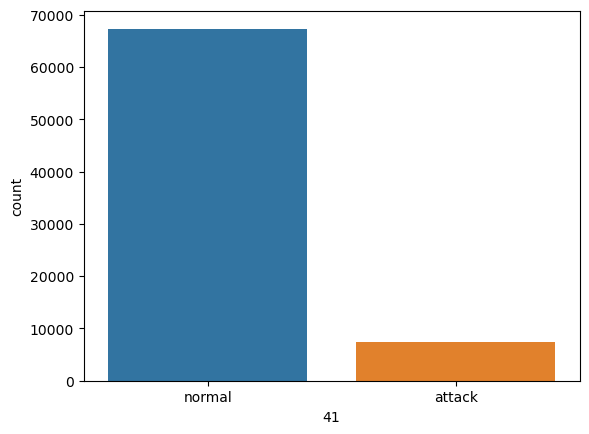

In [19]:
sns.countplot(x=df['41'])
plt.show()

#### View distribution of each of the numerical features

In [20]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float':
        print(column)

0
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [ ]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float':
        sns.histplot(df[column])
        plt.title(column)
        plt.show()

In [ ]:
df.head()

In [17]:
df['41'].unique()

array(['normal', 'ipsweep', 'portsweep', 'teardrop'], dtype=object)

In [19]:
def change(x):
    if x=='normal':
        return 0
    else:
        return 1
    

In [20]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal


In [22]:
df['41'].unique()

array(['normal', 'attack'], dtype=object)

In [23]:
df['1'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [24]:
df['41']=df['41'].apply(change)

In [25]:
df['41'].unique()

array([0, 1], dtype=int64)

In [26]:
new_df=pd.get_dummies(df,drop_first=True)

In [27]:
new_df.head()

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,1_tcp,1_udp,2_X11,2_Z39_50,2_auth,2_bgp,2_courier,2_csnet_ns,2_ctf,2_daytime,2_discard,2_domain,2_domain_u,2_echo,2_eco_i,2_ecr_i,2_efs,2_exec,2_finger,2_ftp,2_ftp_data,2_gopher,2_hostnames,2_http,2_http_443,2_imap4,2_iso_tsap,2_klogin,2_kshell,2_ldap,2_link,2_login,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nnsp,2_nntp,2_ntp_u,2_other,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_REJ,3_RSTO,3_RSTOS0,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [28]:
y=new_df['41']
X=new_df.drop(columns=['41'])

In [29]:
X.shape

(74765, 114)

In [30]:
y.shape

(74765,)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_scaled=scaler.fit_transform(X)

In [34]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [35]:
X.head()

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1_tcp,1_udp,2_X11,2_Z39_50,2_auth,2_bgp,2_courier,2_csnet_ns,2_ctf,2_daytime,2_discard,2_domain,2_domain_u,2_echo,2_eco_i,2_ecr_i,2_efs,2_exec,2_finger,2_ftp,2_ftp_data,2_gopher,2_hostnames,2_http,2_http_443,2_imap4,2_iso_tsap,2_klogin,2_kshell,2_ldap,2_link,2_login,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nnsp,2_nntp,2_ntp_u,2_other,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_REJ,3_RSTO,3_RSTOS0,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,-0.141581,-0.009381,-0.006156,-0.009677,-0.109664,-0.008178,-0.094835,-0.026488,-1.334704,-0.014699,-0.042846,-0.031559,-0.016012,-0.032656,-0.022358,-0.05267,0.0,-0.003657,-0.108695,-0.370143,-0.425418,-0.146649,-0.138902,-0.302941,-0.304741,0.228920,-0.213956,-0.484384,0.045739,-1.515507,-1.697304,-0.196892,-0.039949,-0.356480,-0.153742,-0.109300,-0.115967,-0.311846,0.558106,-0.465723,-0.029949,-0.010345,-0.057221,-0.010972,-0.008178,-0.010345,-0.016762,-0.013685,-0.014166,-0.027863,-0.370728,-0.013685,-0.224619,-0.054077,-0.007315,-0.008959,-0.087727,-0.112901,3.731374,-0.017156,-0.010972,-1.018590,-0.008178,-0.012131,-0.010972,-0.008178,-0.007315,-0.008178,-0.015518,-0.007315,-0.016358,-0.015943,-0.011566,-0.010972,-0.010345,-0.01267,-0.008959,-0.010972,-0.047456,-0.207668,-0.008178,-0.051005,-0.007315,-0.242486,-0.010345,-0.014166,-0.014166,-0.010345,-0.322842,-0.010972,-0.018651,-0.010345,-0.01267,-0.013187,-0.112961,-0.006335,-0.008178,-0.036413,-0.011566,-0.089869,-0.008178,-0.011566,-0.010345,-0.015943,-0.224849,-0.062725,-0.037142,-0.179152,-0.074075,-0.069656,-0.039927,-0.024541,0.328944,-0.005172
1,-0.141581,-0.009426,-0.006156,-0.009677,-0.109664,-0.008178,-0.094835,-0.026488,-1.334704,-0.014699,-0.042846,-0.031559,-0.016012,-0.032656,-0.022358,-0.05267,0.0,-0.003657,-0.108695,-0.170203,-0.442769,-0.146649,-0.138902,-0.302941,-0.304741,-5.480725,0.736560,-0.484384,1.056093,-1.756205,-2.172792,2.894817,2.146987,-0.356480,-0.153742,-0.109300,-0.317606,-0.311846,-1.791773,2.147198,-0.029949,-0.010345,-0.057221,-0.010972,-0.008178,-0.010345,-0.016762,-0.013685,-0.014166,-0.027863,-0.370728,-0.013685,-0.224619,-0.054077,-0.007315,-0.008959,-0.087727,-0.112901,-0.267998,-0.017156,-0.010972,-1.018590,-0.008178,-0.012131,-0.010972,-0.008178,-0.007315,-0.008178,-0.015518,-0.007315,-0.016358,-0.015943,-0.011566,-0.010972,-0.010345,-0.01267,-0.008959,-0.010972,-0.047456,4.815388,-0.008178,-0.051005,-0.007315,-0.242486,-0.010345,-0.014166,-0.014166,-0.010345,-0.322842,-0.010972,-0.018651,-0.010345,-0.01267,-0.013187,-0.112961,-0.006335,-0.008178,-0.036413,-0.011566,-0.089869,-0.008178,-0.011566,-0.010345,-0.015943,-0.224849,-0.062725,-0.037142,-0.179152,-0.074075,-0.069656,-0.039927,-0.024541,0.328944,-0.005172
2,-0.141581,-0.009415,-0.004594,-0.009677,-0.109664,-0.008178,-0.094835,-0.026488,0.749230,-0.014699,-0.042846,-0.031559,-0.016012,-0.032656,-0.022358,-0.05267,0.0,-0.003657,-0.108695,-0.315614,-0.373363,1.897439,2.123206,-0.302941,-0.304741,0.228920,-0.213956,-0.484384,-1.108952,0.791180,0.624192,-0.359614,-0.471176,-0.067293,0.183268,0.049339,-0.317606,-0.274103,0.558106,-0.465723,-0.029949,-0.010345,-0.057221,-0.010972,-0.008178,-0.010345,-0.016762,-0.013685,-0.014166,-0.027863,-0.370728,-0.013685,-0.224619,-0.054077,-0.007315,-0.008959,-0.087727,-0.112901,-0.267998,-0.017156,-0.010972,0.981749,-0.008178,-0.012131,-0.010972,-0.008178,-0.007315,-0.008178,-0.015518,-0.007315,-0.016358,-0.015943,-0.011566,-0.010972,-0.010345,-0.01267,-0.008959,-0.010972,-0.047456,-0.207668,-0.008178,-0.051005,-0.007315,-0.242486,-0.010345,-0.014166,-0.014166,-0.010345,-0.322842,-0.010972,-0.018651,-0.010345,-0.01267,-0.013187,-0.112961,-0.006335,-0.008178,-0.036413,-0.011566,-0.089869,-0.008178,-0.011566,-0.010345,

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
X_train.shape

(59812, 114)

In [39]:
X_test.shape

(14953, 114)

In [40]:
y_train.shape

(59812,)

In [41]:
y_test.shape

(14953,)

### LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()

In [48]:
%time model.fit(X_train,y_train)

CPU times: total: 1.36 s
Wall time: 2.12 s


LogisticRegression()

In [49]:
model.score(X_train,y_train)

0.9974252658329432

In [50]:
y_pred=model.predict(X_test)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn import metrics

In [53]:
metrics.accuracy_score(y_test,y_pred)

0.9963218083327761

In [54]:
metrics.confusion_matrix(y_test,y_pred)

array([[13371,    33],
       [   22,  1527]], dtype=int64)

<Axes: >

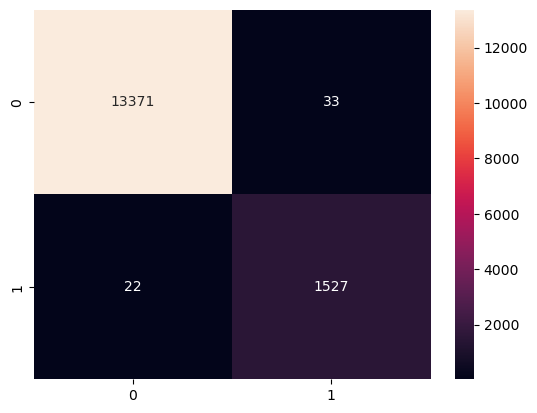

In [55]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [56]:
print('classification report:')
print(metrics.classification_report(y_test,y_pred))

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13404
           1       0.98      0.99      0.98      1549

    accuracy                           1.00     14953
   macro avg       0.99      0.99      0.99     14953
weighted avg       1.00      1.00      1.00     14953



In [57]:
from sklearn.svm import SVC

In [58]:
model_svm=SVC()

In [60]:
%time model_svm.fit(X_train,y_train)

CPU times: total: 6.84 s
Wall time: 11.3 s


SVC()

In [61]:
model_svm.score(X_train,y_train)

0.997040727613188

In [62]:
y_pred_svm=model_svm.predict(X_test)

In [63]:
metrics.accuracy_score(y_test,y_pred_svm)

0.9956530462114626

In [64]:
metrics.confusion_matrix(y_test,y_pred_svm)

array([[13355,    49],
       [   16,  1533]], dtype=int64)

<Axes: >

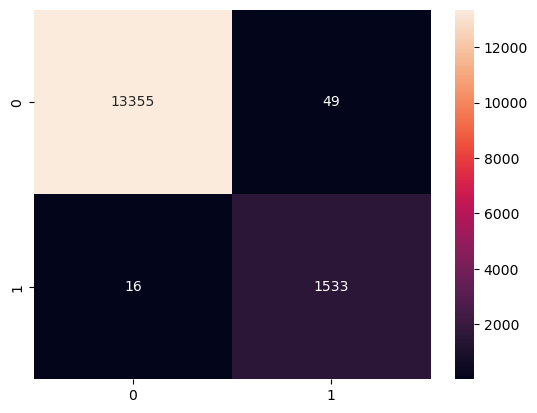

In [65]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_svm),annot=True,fmt='d')

In [66]:
print('classification report:')
print(metrics.classification_report(y_test,y_pred_svm))

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13404
           1       0.97      0.99      0.98      1549

    accuracy                           1.00     14953
   macro avg       0.98      0.99      0.99     14953
weighted avg       1.00      1.00      1.00     14953



### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [73]:
params={'n_estimators':[32,50,100],'n_jobs':[1,2]}

In [74]:
gsv=GridSearchCV(RandomForestClassifier(),params,cv=3,scoring='accuracy', verbose = 3)

In [75]:
%time gsv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .........n_estimators=32, n_jobs=1;, score=1.000 total time=   1.3s
[CV 2/3] END .........n_estimators=32, n_jobs=1;, score=1.000 total time=   1.3s
[CV 3/3] END .........n_estimators=32, n_jobs=1;, score=1.000 total time=   1.3s
[CV 1/3] END .........n_estimators=32, n_jobs=2;, score=1.000 total time=   1.1s
[CV 2/3] END .........n_estimators=32, n_jobs=2;, score=1.000 total time=   1.1s
[CV 3/3] END .........n_estimators=32, n_jobs=2;, score=1.000 total time=   1.1s
[CV 1/3] END .........n_estimators=50, n_jobs=1;, score=1.000 total time=   2.0s
[CV 2/3] END .........n_estimators=50, n_jobs=1;, score=1.000 total time=   1.7s
[CV 3/3] END .........n_estimators=50, n_jobs=1;, score=1.000 total time=   1.8s
[CV 1/3] END .........n_estimators=50, n_jobs=2;, score=1.000 total time=   1.5s
[CV 2/3] END .........n_estimators=50, n_jobs=2;, score=1.000 total time=   1.5s
[CV 3/3] END .........n_estimators=50, n_jobs=2;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [32, 50, 100], 'n_jobs': [1, 2]},
             scoring='accuracy', verbose=3)

In [76]:
gsv.score(X_train,y_train)

1.0

In [77]:
gsv.best_estimator_

RandomForestClassifier(n_jobs=1)

In [78]:
gsv.best_params_

{'n_estimators': 100, 'n_jobs': 1}

In [79]:
gsv.best_score_

0.9997659326983653

In [80]:
y_pred_gsv=gsv.predict(X_test)

In [81]:
y_pred_gsv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
metrics.accuracy_score(y_test,y_pred_gsv)

0.9999331237878687

In [83]:
metrics.confusion_matrix(y_test,y_pred_gsv)

array([[13404,     0],
       [    1,  1548]], dtype=int64)

<Axes: >

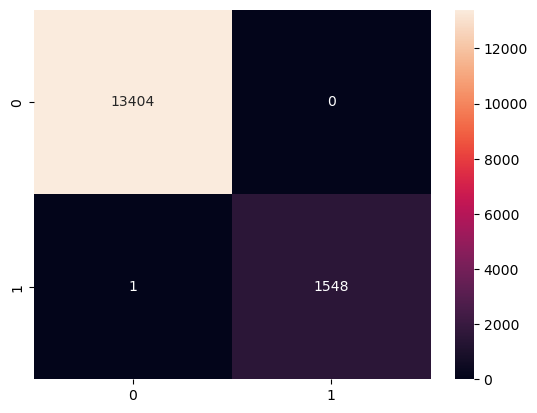

In [84]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_gsv),annot=True,fmt='d')

In [85]:
print(metrics.classification_report(y_test,y_pred_gsv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13404
           1       1.00      1.00      1.00      1549

    accuracy                           1.00     14953
   macro avg       1.00      1.00      1.00     14953
weighted avg       1.00      1.00      1.00     14953



## K Mean Model

In [86]:
from sklearn.cluster import KMeans

In [87]:
model_k=KMeans(n_clusters=2)

In [98]:
%time cluster=model_k.fit_predict(new_df.drop(columns = ['41']))

CPU times: total: 13.7 s
Wall time: 1.93 s


In [99]:
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
new_df['clusters']=cluster

In [101]:
new_df.head()

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,1_tcp,1_udp,2_X11,2_Z39_50,2_auth,2_bgp,2_courier,2_csnet_ns,2_ctf,2_daytime,2_discard,2_domain,2_domain_u,2_echo,2_eco_i,2_ecr_i,2_efs,2_exec,2_finger,2_ftp,2_ftp_data,2_gopher,2_hostnames,2_http,2_http_443,2_imap4,2_iso_tsap,2_klogin,2_kshell,2_ldap,2_link,2_login,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nnsp,2_nntp,2_ntp_u,2_other,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_REJ,3_RSTO,3_RSTOS0,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,clusters
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
4,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0


In [102]:
new_df['clusters'].unique()

array([0, 1])

In [103]:
ndf0=new_df[new_df['clusters']==0]
ndf1=new_df[new_df['clusters']==1]

In [104]:
ndf0

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,1_tcp,1_udp,2_X11,2_Z39_50,2_auth,2_bgp,2_courier,2_csnet_ns,2_ctf,2_daytime,2_discard,2_domain,2_domain_u,2_echo,2_eco_i,2_ecr_i,2_efs,2_exec,2_finger,2_ftp,2_ftp_data,2_gopher,2_hostnames,2_http,2_http_443,2_imap4,2_iso_tsap,2_klogin,2_kshell,2_ldap,2_link,2_login,2_mtp,2_name,2_netbios_dgm,2_netbios_ns,2_netbios_ssn,2_netstat,2_nnsp,2_nntp,2_ntp_u,2_other,2_pop_2,2_pop_3,2_printer,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_sql_net,2_ssh,2_sunrpc,2_supdup,2_systat,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_uucp,2_uucp_path,2_vmnet,2_whois,3_REJ,3_RSTO,3_RSTOS0,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,clusters
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
4,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.00,0.00,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [106]:
metrics.accuracy_score(new_df['41'], new_df['clusters'])

0.9007824516819367

***